# Q1) CLUSTERING

name-Rajrishi Sarkar  
Roll-203110061  
EE769 assignment3  

## Importing libraries

In [1]:
#impporting the dataframe and visualization libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#importing stats
from scipy import stats

#importing metrics
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [2]:
data=pd.read_csv(r"C:\Users\ADMIN\Desktop\data for data analysis\assignmnent 3 ee769\DataClustering.csv")
df=pd.DataFrame(data)
df.head()

,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035
2,0.976953,1.058524,1.217530,1.357238
3,1.014365,1.122684,1.195847,0.984144
4,1.041386,1.219014,0.864819,1.720825


## Checking the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      351 non-null    float64
 1   x2      351 non-null    float64
 2   x3      351 non-null    float64
 3   x4      351 non-null    float64
dtypes: float64(4)
memory usage: 11.1 KB


In [4]:
#checking the data statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,351.0,0.278820,0.341446,0.048604,0.111341,0.153383,0.212564,2.037125
x2,351.0,0.472738,0.511023,0.047022,0.115257,0.165684,0.854725,2.476118
x3,351.0,1.643857,1.668052,0.367717,0.815180,1.083528,1.557597,12.635585
x4,351.0,1.482918,0.964016,0.232562,0.857948,1.190996,1.724461,7.726843


In [5]:
#checking for null values
df.isna().sum()

x1    0
x2    0
x3    0
x4    0
dtype: int64

there are no null values in any of the four features

## Exploratory data analysis

**visualizing the correlation between the features**

<AxesSubplot:>

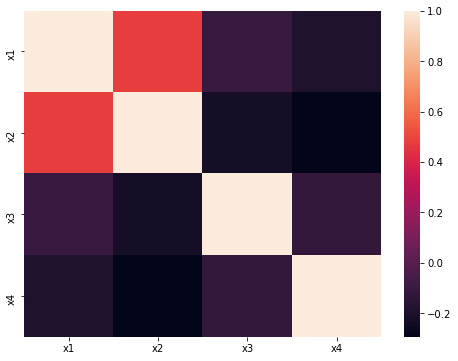

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr())

**Visualizing the feature distributions**

In [7]:
#a function for statistical analysis of features

def feature_stats(df,feature):
    
    sns.set_style("darkgrid")
    #creating the subplots
    fig,ax=plt.subplots(1,3,figsize=(15,5))
    #adding the distribution plot
    sns.distplot(x=df[feature],kde=True,ax=ax[0]).set_title("distribution plot of "+feature)
    #adding the probability plot
    stats.probplot(x=df[feature],plot=ax[1])
    #adding boxplot
    sns.boxplot(x=df[feature],ax=ax[2]).set_title("boxplot of "+feature)    

**features before transformation**

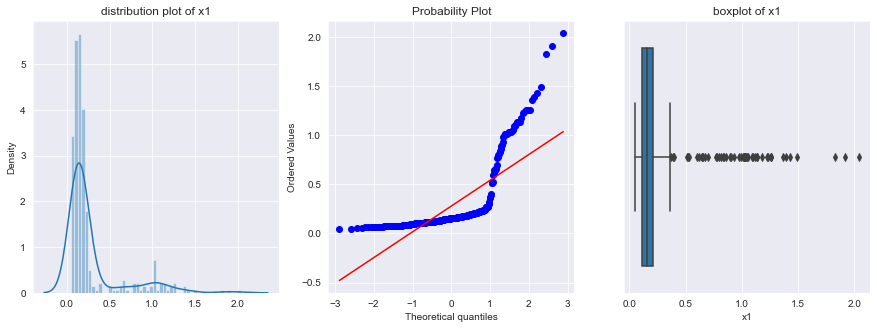

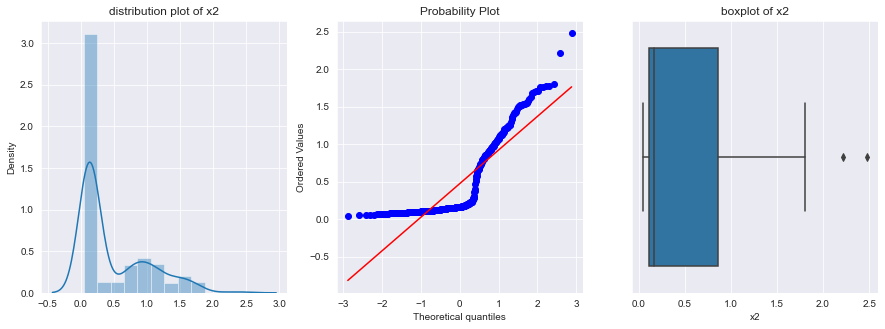

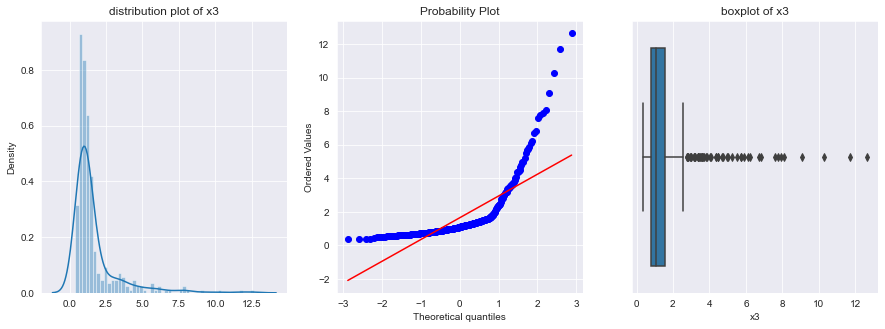

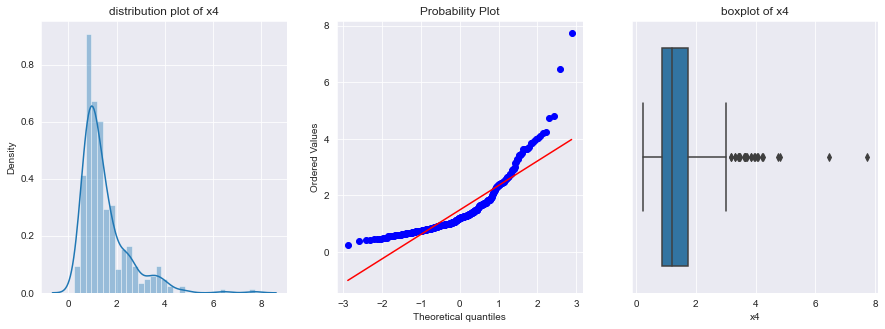

In [8]:
#applying a for loop for running the created function over all the columns in the dataframe
for i in df.columns:
    feature_stats(df,i)

all the features are skewed in nature so log transformation is needed inorder to decrease the skewness

**features after transformation**

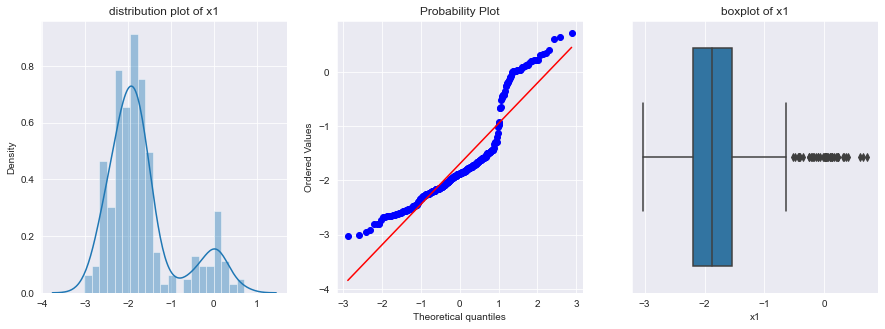

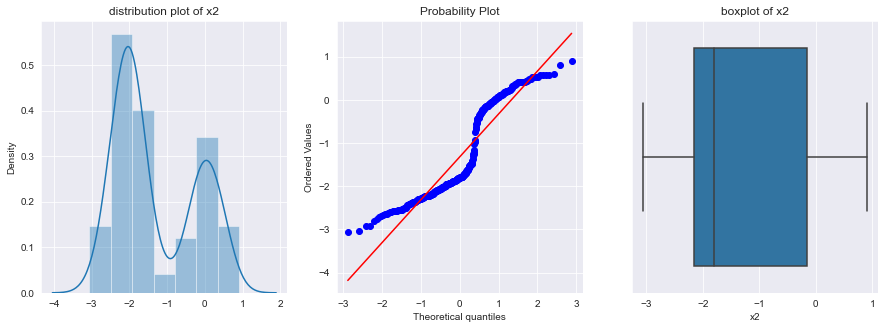

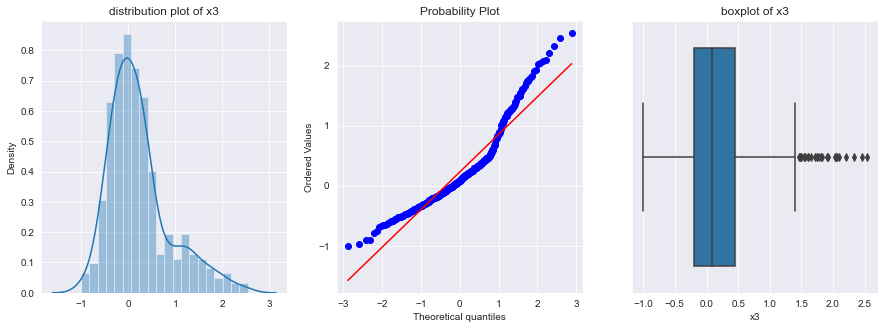

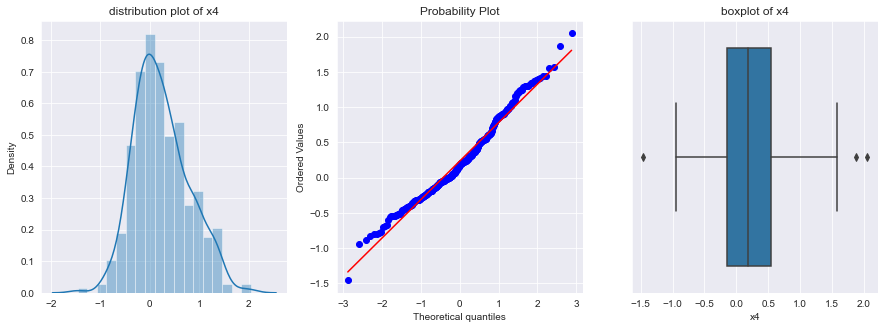

In [9]:
#applying log transformation to all the features
for i in df.columns:
    df[i]=np.log(df[i])
#reviewing the features after log transformation    
for i in df.columns:
    feature_stats(df,i)    

we are done with the data visaualization and analysis part

## Data Standardization

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_scaled=sc.fit_transform(df)

## Data clustering

**Applying kmeans**

Text(0, 0.5, 'WCSS')

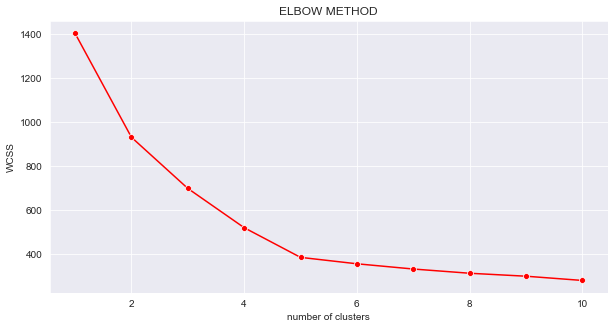

In [11]:
#lets find the optimum number of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)##inertia_ is the formula used to segregate the data points into cluster
    
#visualizing the optimum number of clusters with the help of elbow method
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.lineplot(x=range(1,11),y=wcss,marker="o",color="red")
plt.title("ELBOW METHOD")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")

we get to know from the elbow method that the best cluster lies somewhere between 2 to 7 number of cluster  
lets visualize the davies_bouldin_score of all these cluster and find tyhe optimum cluster 

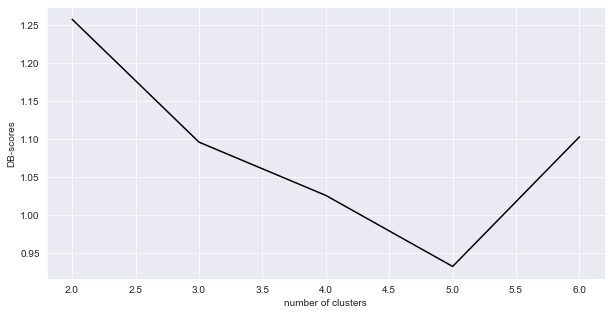

In [12]:
#finding the db scores of all the clusters,lower the dbscore better the cluster and storing it in a list
dbscores=[]
for i in range(2,7):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    labels=kmeans.fit_predict(df_scaled)
    score=metrics.davies_bouldin_score(df_scaled,labels)
    dbscores.append(score)

#plotting db scores vs no. of clusters    
plt.figure(figsize=(10,5))    
sns.lineplot(x=range(2,7),y=dbscores,color="black")
plt.xlabel("number of clusters")
plt.ylabel("DB-scores")
plt.show()

so the best n_cluster=5

**Visualizing the clusters through tsne embedding**  
we take the optimum number of clusters that we found and cluster the sample points in the two  
dimesional space of TSNE

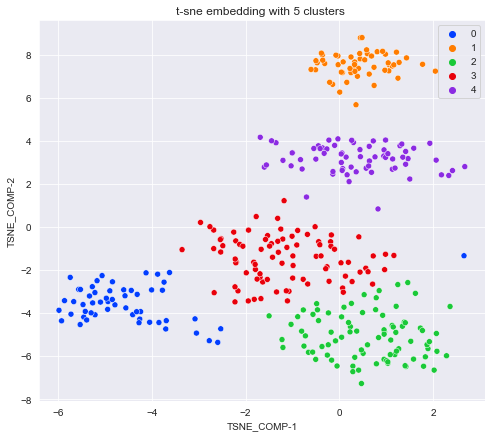

In [16]:
from sklearn.manifold import TSNE

#fitting the data to TSNE with n_componenets=2
tsne=TSNE(n_components=2,perplexity=100)
tsne_comp=tsne.fit_transform(df_scaled)

#taking the cluster number int the two dimensional tsne to be n_clusters=5
kmeans=KMeans(n_clusters=5,random_state=0)
labels=kmeans.fit_predict(df_scaled)

#Visualizing the clusters on  tsne components
plt.figure(figsize=(8,7))
sns.scatterplot(x=tsne_comp[:,0],y=tsne_comp[:,1],hue=labels,palette="bright")
plt.xlabel("TSNE_COMP-1")
plt.ylabel("TSNE_COMP-2")
plt.title("t-sne embedding with 5 clusters ")
plt.show()